# Import packages

In [ ]:
import geopandas
import numpy as np
import pandas as pd
import mapclassify
import folium

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import LSOA data from GeoJSON file

In [3]:
lsoa_path = "data/LSOA_Dec_2011_Boundaries_Generalised_Clipped_BGC_EW_V3_-335161623626682850.geojson"
lsoa_gdf = geopandas.read_file(lsoa_path)
lsoa_gdf.tail()

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
34748,34749,W01001954,Cardiff 006F,Caerdydd 006F,312960,180568,-3.25581,51.51730,326f360d-8c5f-4d7e-a93a-898d8b6ab5dd,"POLYGON ((-3.25546 51.52101, -3.25489 51.51968..."
34749,34750,W01001955,Swansea 025F,Abertawe 025F,265633,193182,-3.94237,51.62137,823e7ad3-5fc5-4c4b-b9d4-3e0a480058fe,"POLYGON ((-3.94053 51.63059, -3.93913 51.62702..."
34750,34751,W01001956,Swansea 023E,Abertawe 023E,260583,192617,-4.01504,51.61507,7a48ad46-8b4d-4b0f-8ac8-ef2973a3a39e,"POLYGON ((-4.02465 51.63615, -4.02458 51.63574..."
34751,34752,W01001957,Swansea 025G,Abertawe 025G,265334,192555,-3.94644,51.61567,1a2d08fc-992a-49c9-b07c-832930c197b8,"POLYGON ((-3.9492 51.61754, -3.94814 51.6167, ..."
34752,34753,W01001958,Swansea 025H,Abertawe 025H,266265,192629,-3.93303,51.61655,babcf36f-90c2-4e82-a286-8398ded77ecc,"POLYGON ((-3.93505 51.62182, -3.93146 51.61739..."


In [4]:
# Remove LSOAs that are in Wales
lsoa_gdf = lsoa_gdf[lsoa_gdf.LSOA11CD.str[0] != 'W']
lsoa_gdf.tail()

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
32839,32840,E01033764,Liverpool 022E,Liverpool 022E,334835,391776,-2.98197,53.41875,11d9e10b-fc0a-4306-8655-54fee74b21eb,"POLYGON ((-2.98082 53.43356, -2.981 53.43318, ..."
32840,32841,E01033765,Liverpool 061D,Liverpool 061D,334922,388603,-2.98001,53.39025,170eae04-41d1-4156-9a0c-c55b4b6e7e35,"POLYGON ((-2.9776 53.3934, -2.977 53.39212, -2..."
32841,32842,E01033766,Liverpool 042G,Liverpool 042G,338828,388254,-2.92121,53.38758,b9be787c-9448-47ea-b353-e3591aa6a446,"POLYGON ((-2.9216 53.38858, -2.92118 53.38828,..."
32842,32843,E01033767,Liverpool 050J,Liverpool 050J,335569,387577,-2.97007,53.38111,768de9e9-98a8-4d43-a0a6-a7d018e6bf41,"POLYGON ((-2.96989 53.38311, -2.96847 53.38242..."
32843,32844,E01033768,Liverpool 037F,Liverpool 037F,335929,389405,-2.96503,53.39758,7fe7a0b9-840e-48ba-8b79-46cd31e187f4,"POLYGON ((-2.9623 53.3992, -2.96159 53.39744, ..."


In [5]:
# Set index to the LSOA code
lsoa_gdf = lsoa_gdf.set_index('LSOA11CD')
lsoa_gdf.tail()

,FID,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
LSOA11CD,,,,,,,,,
E01033764,32840,Liverpool 022E,Liverpool 022E,334835,391776,-2.98197,53.41875,11d9e10b-fc0a-4306-8655-54fee74b21eb,"POLYGON ((-2.98082 53.43356, -2.981 53.43318, ..."
E01033765,32841,Liverpool 061D,Liverpool 061D,334922,388603,-2.98001,53.39025,170eae04-41d1-4156-9a0c-c55b4b6e7e35,"POLYGON ((-2.9776 53.3934, -2.977 53.39212, -2..."
E01033766,32842,Liverpool 042G,Liverpool 042G,338828,388254,-2.92121,53.38758,b9be787c-9448-47ea-b353-e3591aa6a446,"POLYGON ((-2.9216 53.38858, -2.92118 53.38828,..."
E01033767,32843,Liverpool 050J,Liverpool 050J,335569,387577,-2.97007,53.38111,768de9e9-98a8-4d43-a0a6-a7d018e6bf41,"POLYGON ((-2.96989 53.38311, -2.96847 53.38242..."
E01033768,32844,Liverpool 037F,Liverpool 037F,335929,389405,-2.96503,53.39758,7fe7a0b9-840e-48ba-8b79-46cd31e187f4,"POLYGON ((-2.9623 53.3992, -2.96159 53.39744, ..."


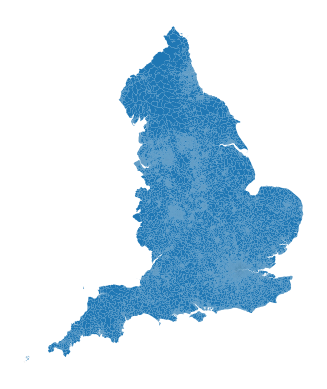

In [6]:
lsoa_plot = lsoa_gdf.plot()

lsoa_plot.set_axis_off()

# Load Small Area Mental Health Index (SAMHI) data from CSV file

In [7]:
samhi_path = "data/samhi_21_01_v5.00_2011_2022_LSOA.csv"
samhi_df = pd.read_csv(samhi_path)

samhi_df.head()

,lsoa11,samhi_index.2011,samhi_dec.2011,samhi_index.2012,samhi_dec.2012,samhi_index.2013,samhi_dec.2013,samhi_index.2014,samhi_dec.2014,samhi_index.2015,...,samhi_index.2018,samhi_dec.2018,samhi_index.2019,samhi_dec.2019,samhi_index.2020,samhi_dec.2020,samhi_index.2021,samhi_dec.2021,samhi_index.2022,samhi_dec.2022
0,E01000001,-1.757895,1,-1.682242,1,-2.010783,1,-1.551406,1,-1.534943,...,-1.327943,1,-1.007002,1,-1.141753,1,-0.938783,1,-1.161851,1
1,E01000002,-1.752900,1,-1.800783,1,-1.943415,1,-1.872667,1,-1.568602,...,-1.194894,1,-1.060509,1,-1.385228,1,-1.166509,1,-1.186594,1
2,E01000003,-0.879433,6,-0.538204,7,-0.316849,8,-0.856988,4,-0.533503,...,-0.598213,2,-0.636049,1,-0.893179,1,-0.918307,1,-0.863323,1
3,E01000005,-1.472755,2,-1.697955,1,-1.314136,2,-1.072065,3,-1.249699,...,-0.583135,2,-0.822970,1,-0.845665,1,-0.949500,1,-1.148611,1
4,E01000006,-2.365960,1,-2.496822,1,-2.204731,1,-2.052902,1,-1.914444,...,-1.547606,1,-1.178148,1,-1.332788,1,-1.235090,1,-1.064454,1


In [8]:
# Rename column with LSOA code to match existing LSOA GeoDataFrame
samhi_df = samhi_df.rename(columns={"lsoa11": "LSOA11CD"})

samhi_df.tail()

,LSOA11CD,samhi_index.2011,samhi_dec.2011,samhi_index.2012,samhi_dec.2012,samhi_index.2013,samhi_dec.2013,samhi_index.2014,samhi_dec.2014,samhi_index.2015,...,samhi_index.2018,samhi_dec.2018,samhi_index.2019,samhi_dec.2019,samhi_index.2020,samhi_dec.2020,samhi_index.2021,samhi_dec.2021,samhi_index.2022,samhi_dec.2022
32839,E01033764,1.875398,10,2.339836,10,1.963559,10,2.078545,10,2.307838,...,3.944611,10,4.333528,10,3.809035,10,4.105639,10,3.974756,10
32840,E01033765,0.515193,10,1.015886,10,0.724475,10,0.548758,9,0.472676,...,1.695274,10,2.353856,10,1.845742,10,2.226433,10,1.325192,8
32841,E01033766,-1.088033,4,-0.608583,7,-0.965611,4,-0.879418,4,-0.431925,...,-0.173691,4,-0.002377,3,0.743542,7,0.636370,6,0.203244,4
32842,E01033767,1.722432,10,0.696033,10,1.146554,10,1.263539,10,1.417007,...,2.298907,10,2.700765,10,2.074838,10,2.100172,10,2.340196,10
32843,E01033768,0.860744,10,1.270487,10,0.026012,9,0.296604,9,0.242919,...,1.079533,9,1.728412,9,1.640649,9,1.868321,9,1.338607,8


In [9]:
# Set (renamed) column with LSOA code as index
samhi_df = samhi_df.set_index('LSOA11CD')

samhi_df.tail()

,samhi_index.2011,samhi_dec.2011,samhi_index.2012,samhi_dec.2012,samhi_index.2013,samhi_dec.2013,samhi_index.2014,samhi_dec.2014,samhi_index.2015,samhi_dec.2015,...,samhi_index.2018,samhi_dec.2018,samhi_index.2019,samhi_dec.2019,samhi_index.2020,samhi_dec.2020,samhi_index.2021,samhi_dec.2021,samhi_index.2022,samhi_dec.2022
LSOA11CD,,,,,,,,,,,,,,,,,,,,,
E01033764,1.875398,10,2.339836,10,1.963559,10,2.078545,10,2.307838,10,...,3.944611,10,4.333528,10,3.809035,10,4.105639,10,3.974756,10
E01033765,0.515193,10,1.015886,10,0.724475,10,0.548758,9,0.472676,9,...,1.695274,10,2.353856,10,1.845742,10,2.226433,10,1.325192,8
E01033766,-1.088033,4,-0.608583,7,-0.965611,4,-0.879418,4,-0.431925,5,...,-0.173691,4,-0.002377,3,0.743542,7,0.636370,6,0.203244,4
E01033767,1.722432,10,0.696033,10,1.146554,10,1.263539,10,1.417007,10,...,2.298907,10,2.700765,10,2.074838,10,2.100172,10,2.340196,10
E01033768,0.860744,10,1.270487,10,0.026012,9,0.296604,9,0.242919,8,...,1.079533,9,1.728412,9,1.640649,9,1.868321,9,1.338607,8


# Join LSOA GeoDataFrame with SAMHI DataFrame

In [10]:
combined_gdf = lsoa_gdf.join(samhi_df)

In [11]:
cmap = "RdYlGn_r"
figsize = (10, 10)

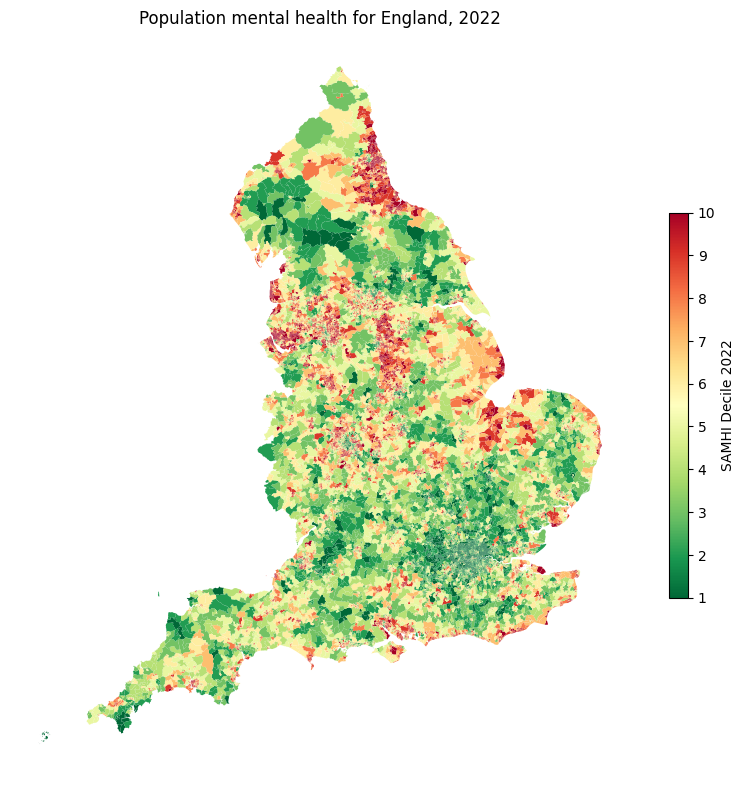

In [12]:
column = "samhi_dec.2022"
legend = True
legend_kwds = {"label": "SAMHI Decile 2022", "orientation": "vertical", "shrink": 0.5, }

combined_plot = combined_gdf.plot(
    column=column,
    cmap=cmap,
    figsize=figsize,
    legend=legend,
    legend_kwds=legend_kwds,
)
combined_plot.set_title("Population mental health for England, 2022")
combined_plot.set_axis_off()

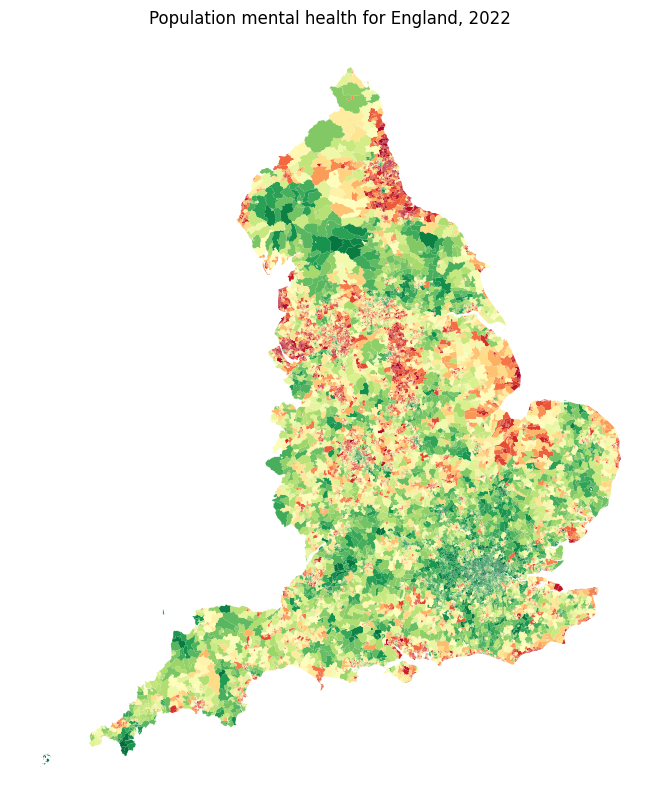

In [13]:
column = "samhi_index.2022"
legend = True
legend_kwds = {"label": "SAMHI Index 2022", "orientation": "vertical", "shrink": 0.5, }

combined_plot = combined_gdf.plot(
    column=column,
    cmap=cmap,
    figsize=figsize,
    scheme="Quantiles",
    k=100,
)
combined_plot.set_title("Population mental health for England, 2022")
combined_plot.set_axis_off()

In [14]:
brighton_filter = combined_gdf['LSOA11NMW'].str.startswith('Brighton')
tooltip = ["LSOA11CD", "samhi_index.2022", "samhi_dec.2022"]
style_kwds = { "stroke": False }

combined_gdf[brighton_filter].explore(
    column=column, 
    legend=False,
    cmap=cmap,
    tiles="Cartodb Positron",
    tooltip=tooltip,
    scheme="Quantiles",
    k=50,
    style_kwds = style_kwds,
    )



In [15]:
nottingham_filter = combined_gdf['LSOA11NMW'].str.startswith('Nottingham')

combined_gdf[nottingham_filter].explore(
    column=column, 
    legend=False,
    cmap=cmap,
    tiles="Cartodb Positron",
    tooltip=tooltip,
    scheme="Quantiles",
    k=50,
    style_kwds = style_kwds,
    )


In [16]:
hastings_filter = combined_gdf['LSOA11NMW'].str.startswith('Hastings')

combined_gdf[hastings_filter].explore(
    column=column, 
    legend=False,
    cmap=cmap,
    tiles="Cartodb Positron",
    tooltip=tooltip,
    scheme="Quantiles",
    k=50,
    style_kwds = style_kwds,
    )